# Plots for cue and movement

In [1]:
from __future__ import print_function
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import glob

# Load cue and movement for one finger

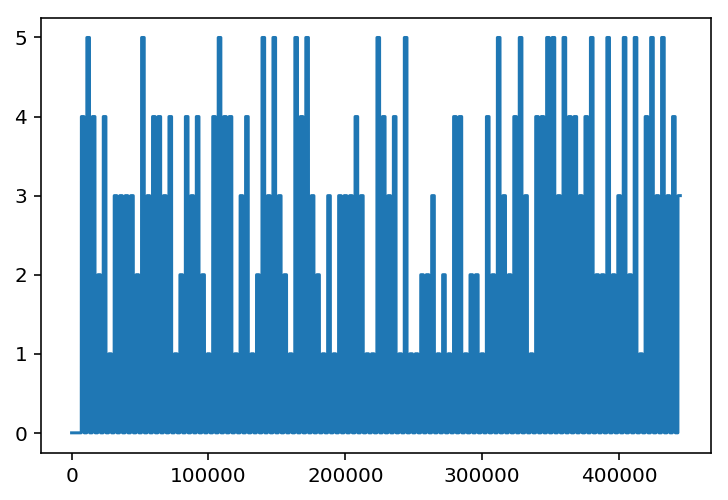

In [2]:
data_dir = 'C:/data2/dg'
cue = np.load(data_dir+'/wm/cue.npy')
plt.plot(cue)

raw_finger=[]
for i in range(5):
    finger = np.load(data_dir+'/wm/finger'+str(i)+'.npy')
    raw_finger.append(finger)

# Plot cue

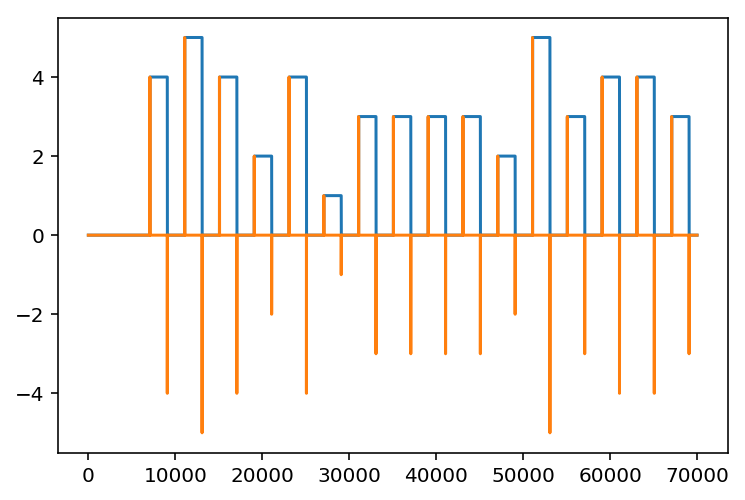

In [3]:
cue_diff=np.diff(cue)
c={'start':{},'end':{}}

for i in range(5):
    c['start'][i] = np.where(cue_diff==i+1)[0]
    c['end'][i] = np.where(cue_diff==-i-1)[0]

plt.plot(cue[:70000])
plt.plot(cue_diff[:70000])


# Example start movement detection

In [4]:
example = raw_finger[2][:70000]

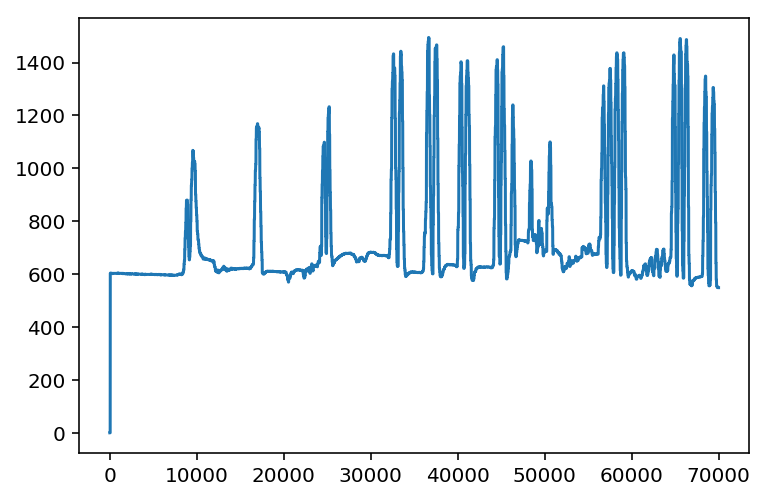

In [5]:
plt.plot(example)

In [6]:
#finger0_deriv = np.abs(np.diff(finger0))
#thresh = 50
#is_moving_finger0 = finger0_deriv > thresh
#move_samples_finger0 = np.argwhere(is_moving==1).transpose()[0]
#move_samples_diff_finger0 = np.diff(move_samples_finger0)

# Function for calculating the start and end of a trial

In [7]:
def fingerStartEnd (finger, thresh = 50, time_thresh = 1000):
    all_start_samps = []
    all_end_samps = []

    finger_deriv = np.abs(np.diff(finger))
    is_moving = finger_deriv > thresh
    move_samples = np.argwhere(is_moving==1).transpose()[0]
    move_samples_diff = np.diff(move_samples)

    all_start_samps.append(move_samples[0])

    N_samps = len(move_samples)
    for i in range(1,N_samps):
        if move_samples_diff[i-1] > time_thresh:
            all_start_samps.append(move_samples[i])
            all_end_samps.append(move_samples[i-1])
    all_end_samps.append(move_samples[-1])
    return np.array(all_start_samps), np.array(all_end_samps)

In [8]:
fingers={'start':{},'end':{}}
fingers['start']={0:[],1:[],2:[],3:[],4:[]}
fingers['end']={0:[],1:[],2:[],3:[],4:[]}
for i in range(5):
    fingers['start'][i],fingers['end'][i] = fingerStartEnd(raw_finger[i])


# Mark the start and end of each trial for one subject

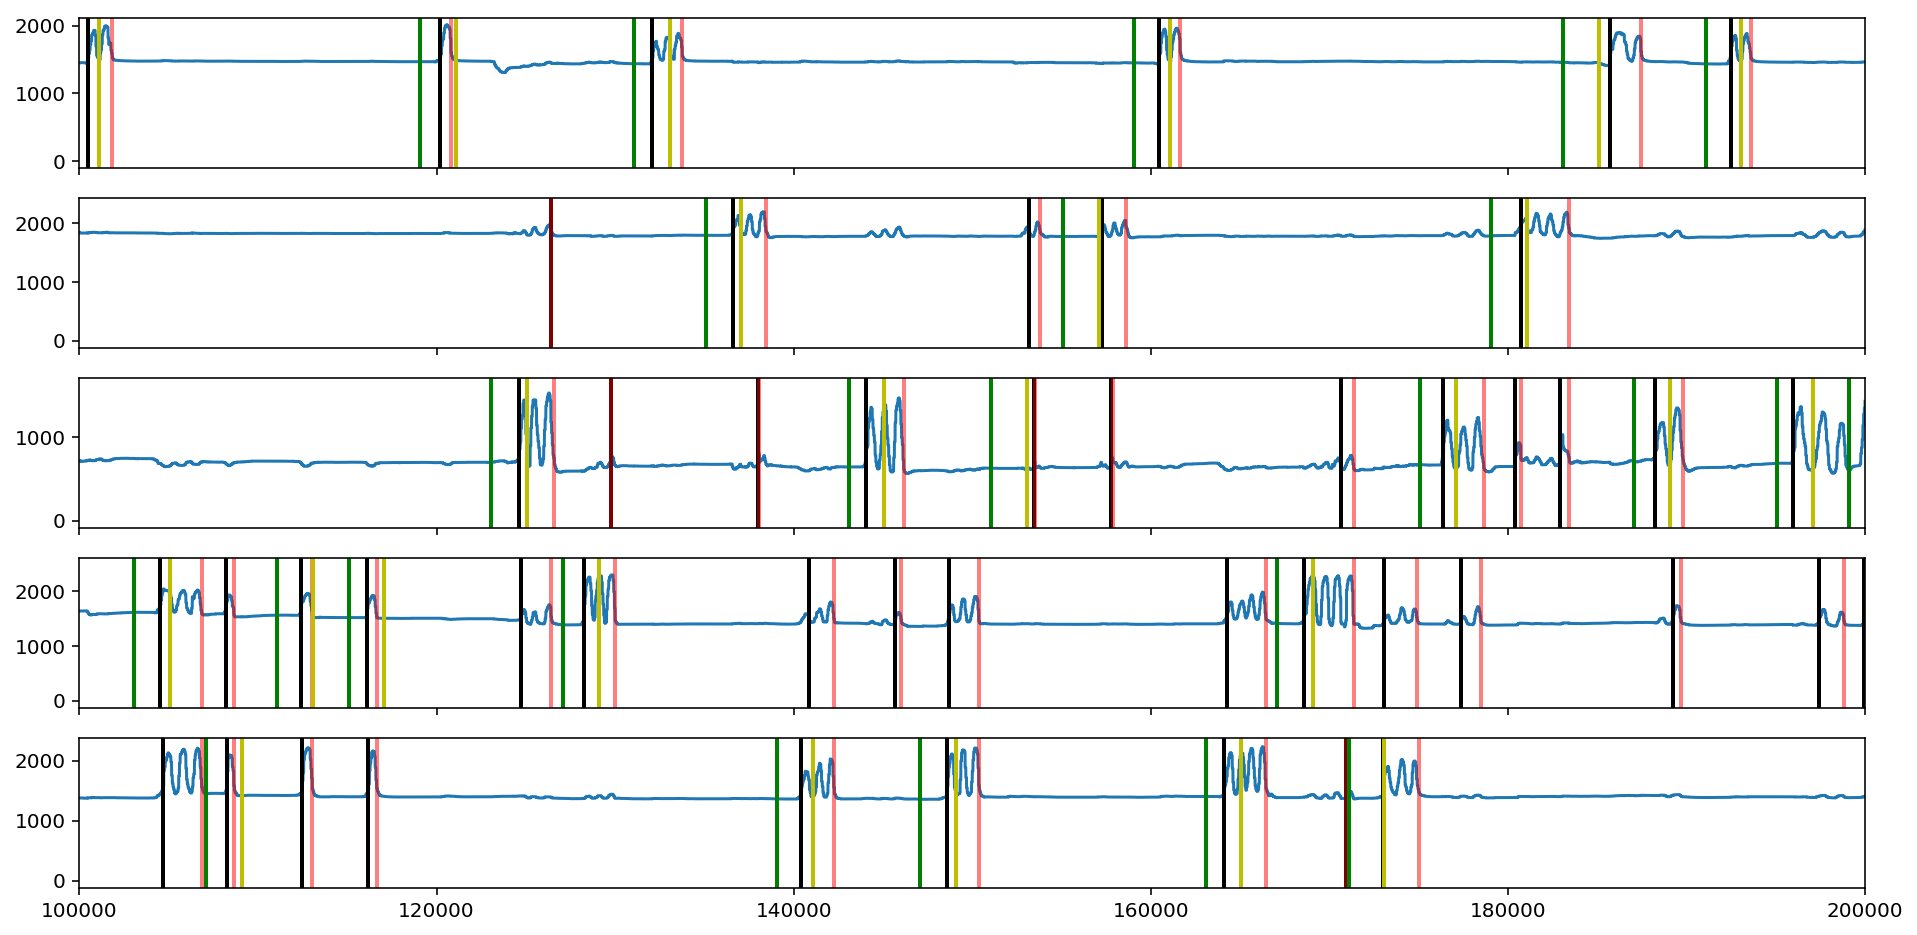

In [9]:
plt.figure(figsize=(16,8))
f, sub = plt.subplots(5, sharex=True,figsize=(16,8))
for k in range(5):
    sub[k].plot(raw_finger[k])
    
    for i,j in zip(fingers['start'][k],fingers['end'][k]):
        sub[k].axvline(x=i, ymin=0, ymax = 3000, linewidth=2, color='k')
        sub[k].axvline(x=j, ymin=0, ymax = 3000, linewidth=2, color='r', alpha=0.5)
    for cueS, cueE in zip(c['start'][k],c['end'][k]):
        sub[k].axvline(x=cueS, ymin=0, ymax = 3000, linewidth=2, color='g')
        sub[k].axvline(x=cueE, ymin=0, ymax = 3000, linewidth=2, color='y')
    plt.xlim(100000,200000)


In [10]:
#Revome bad start and end times
def deleteStartEnd(fingers,interval):
    for k in range(5):
        for i, j in zip(fingers['start'][k],fingers['end'][k]):
            if (j-i<interval):
                fingers['start'][k].remove(i)
                fingers['end'][k].remove(j)

# Plot all subjects

['bp', 'cc', 'ht', 'jc', 'jp', 'mv', 'wc', 'wm', 'zt']


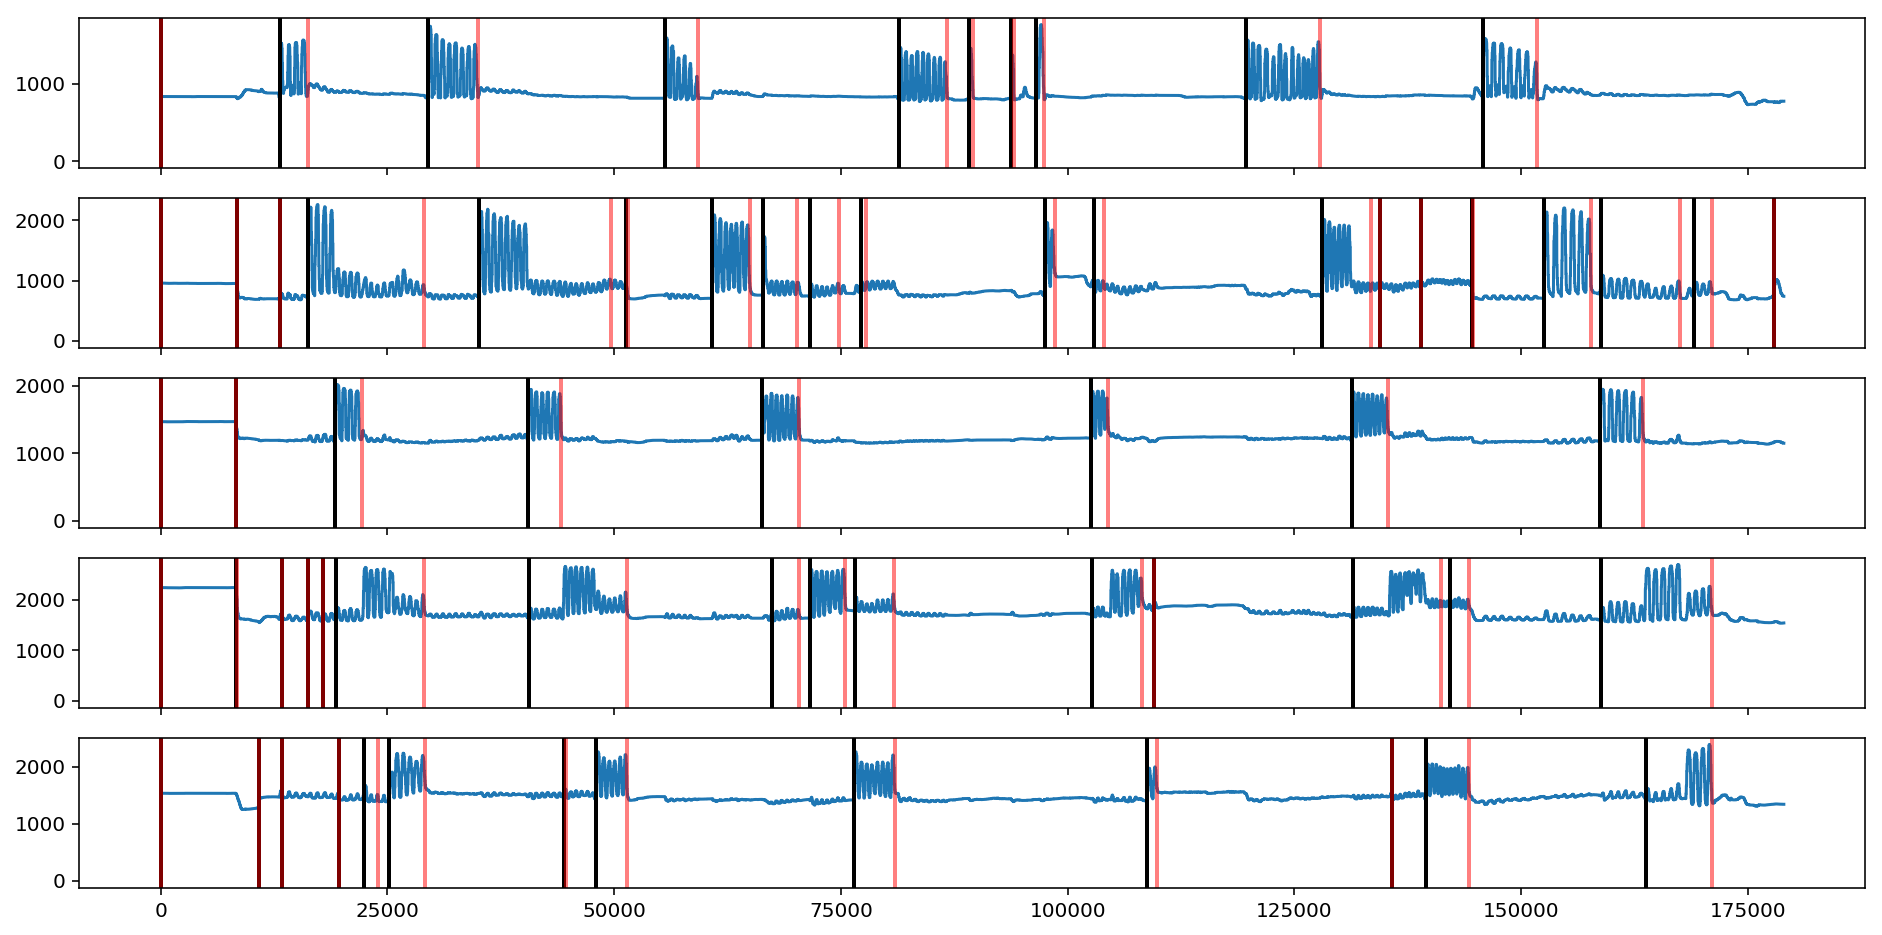

In [15]:
subj_name = 2
subjects = glob.glob(data_dir+'/*')
all_subjects = []
all_subj_fingers={}
all_cues={}
all_cues_diff={}

for sub in subjects:
    
    if len(sub) == len(data_dir)+1+subj_name:
        file_name = sub[-subj_name:]
        all_subjects.append(file_name)
print(all_subjects)

for subjcode in ['mv']:
    
    cue = np.load(data_dir+'/'+subjcode+'/cue.npy')
    xx=np.diff(cue)
    
    all_cues_diff[subjcode]=xx
    all_cues[subjcode]={'start':{},'end':{}}
    for index in range(5):
        all_cues[subjcode]['start'][index] = np.where(xx==index+1)[0]
        all_cues[subjcode]['end'][index] = np.where(xx==-index-1)[0]
    raw_finger=[]
    all_subj_fingers[subjcode]={'start':{},'end':{}}
    for i in range(5):
        finger = np.load(data_dir+'/'+subjcode+'/finger'+str(i)+'.npy')
        raw_finger.append(finger)
        
        all_subj_fingers[subjcode]['start'][i],all_subj_fingers[subjcode]['end'][i]=fingerStartEnd(finger)
        
    plt.figure(figsize=(16,8))

    f, sub = plt.subplots(5, sharex=True,figsize=(16,8))
    for k in range(5):
        sub[k].plot(raw_finger[k])
       
        for start,end in zip(all_subj_fingers[subjcode]['start'][k],all_subj_fingers[subjcode]['end'][k]):
            sub[k].axvline(x=start, ymin=0, ymax = 3000, linewidth=2, color='k')
            sub[k].axvline(x=end, ymin=0, ymax = 3000, linewidth=2, color='r', alpha=0.5)
        for cueS, cueE in zip(all_cues[subjcode]['start'][k],all_cues[subjcode]['end'][k]):
            sub[k].axvline(x=cueS, ymin=0, ymax = 3000, linewidth=2, color='g')
            sub[k].axvline(x=cueE, ymin=0, ymax = 3000, linewidth=2, color='y')
        #plt.(150000,300000)


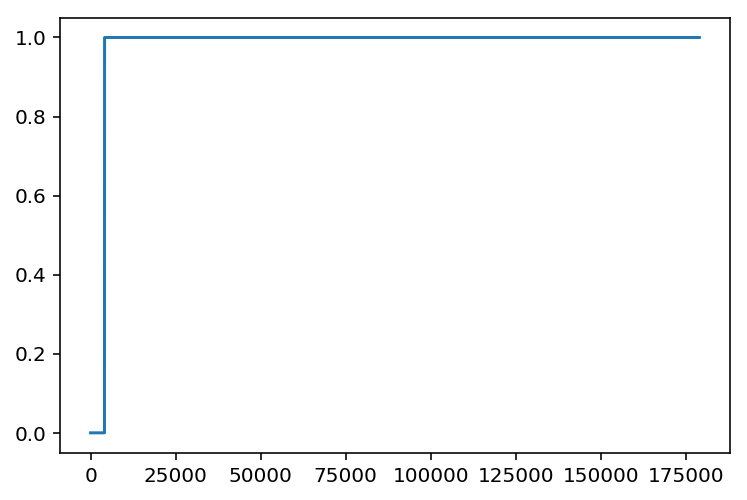

In [17]:
cuemv = np.load('C:/data2/dg/mv/cue.npy')
plt.plot(cuemv)

# Plot delay times

In [12]:
delayStart={}
delayEnd={}
for i in range(5):
    delayStart[i]=[]
    delayEnd[i]=[]
    for start in all_cues['bp']['start'][i]:
        move_start=np.array(all_subj_fingers['bp']['start'][i])
        delayStart[i].append(move_start[move_start>start][0]-start)
    for end in all_cues['bp']['end'][i]:
        move_end=np.array(all_subj_fingers['bp']['end'][i])
        delayEnd[i].append(move_end[move_end>end][0]-end)

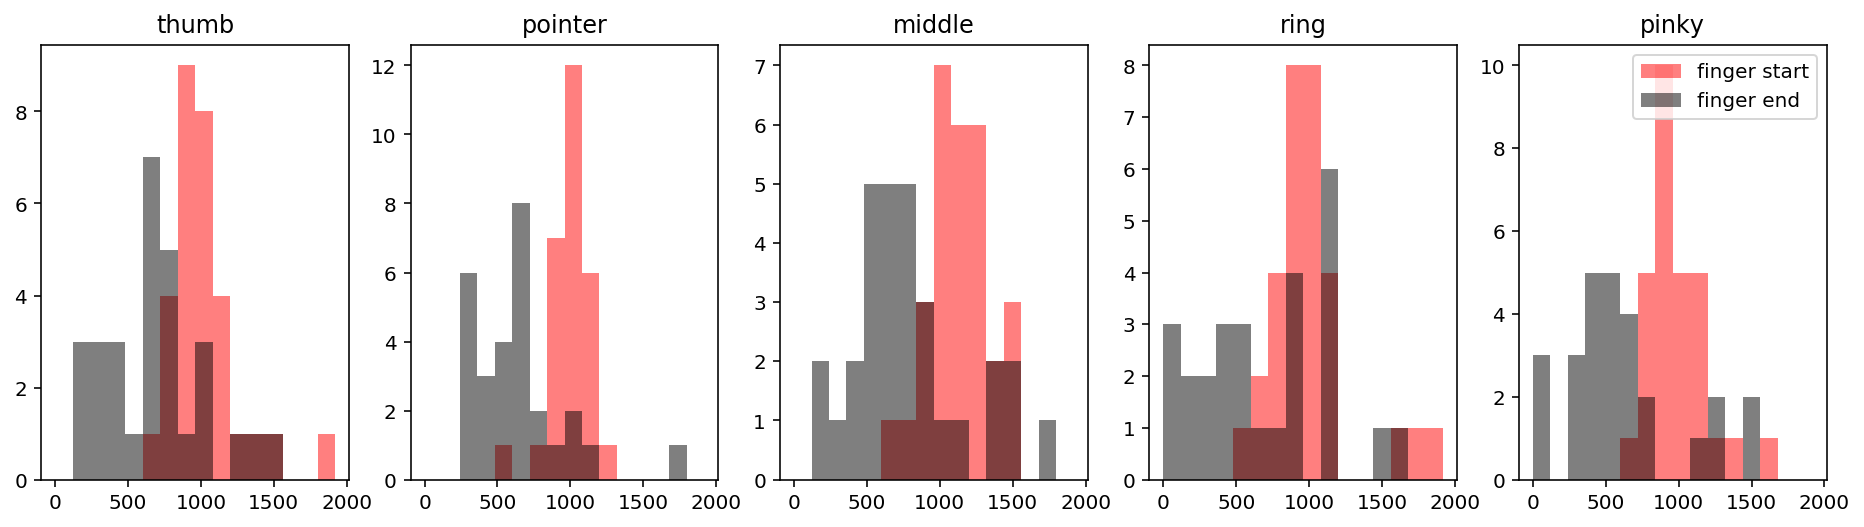

In [13]:
plt.figure(figsize=(16,4))
finger_names = ['thumb','pointer','middle','ring','pinky']

colorArr=['r','k','b','g','y']
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.title(finger_names[i])
    plt.hist(delayStart[i],bins=np.arange(0,2000,120),color='r',alpha=.5,label='finger start')
    plt.hist(delayEnd[i],bins=np.arange(0,2000,120),color='k', alpha=.5,label='finger end')
plt.legend(loc='best')